<a href="https://colab.research.google.com/github/coderTanisha22/Jarvis_learnings/blob/main/Task_2_RAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torchsummary import summary

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

In [3]:
train_set = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

In [4]:
test_set = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

In [5]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=32, shuffle=True
)

In [6]:
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=32, shuffle=False
)

In [7]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.first_layer= nn.Conv2d(1, 32,3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.second_layer = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2,2)
        self.dense1= nn.Linear(64*7*7, 128)
        self.dense2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self,x):
      x = self.pool1(F.relu(self.first_layer(x)))
      x = self.pool2(F.relu(self.second_layer(x)))
      x = x.view(-1, 64*7*7)  #flattening here
      x = F.relu(self.dense1(x))
      x = self.dense2(x)
      return x

In [8]:
model = CNNModel()

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=0.001)

In [10]:
epochs = 20

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        output = model(images)
        loss = loss_fn(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

Epoch 1/20, Loss: 229.4289
Epoch 2/20, Loss: 76.2146
Epoch 3/20, Loss: 49.6765
Epoch 4/20, Loss: 35.9071
Epoch 5/20, Loss: 26.6505
Epoch 6/20, Loss: 22.4783
Epoch 7/20, Loss: 16.1718
Epoch 8/20, Loss: 15.5142
Epoch 9/20, Loss: 12.6356
Epoch 10/20, Loss: 11.6382
Epoch 11/20, Loss: 10.4853
Epoch 12/20, Loss: 12.4817
Epoch 13/20, Loss: 10.2218
Epoch 14/20, Loss: 7.7156
Epoch 15/20, Loss: 8.4377
Epoch 16/20, Loss: 5.6757
Epoch 17/20, Loss: 8.7657
Epoch 18/20, Loss: 6.7241
Epoch 19/20, Loss: 7.4292
Epoch 20/20, Loss: 5.5036


In [11]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 99.08%


In [12]:
from torchsummary import summary
model.cpu()
summary(model, input_size=(1, 28, 28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


Testing with new image

In [13]:
from google.colab import files
uploaded = files.upload()

Saving digit8clear.png.jpg to digit8clear.png (1).jpg


In [14]:
from PIL import Image, ImageOps
img = Image.open("digit8clear.png.jpg")

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
img = ImageOps.fit(img, (28, 28), method=Image.BICUBIC)
img_tensor = transform(img).unsqueeze(0)

model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

print(f"Predicted Digit: {predicted.item()}")


Predicted Digit: 8


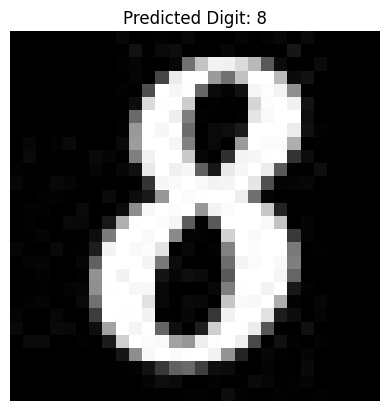

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0][0], cmap='gray')
plt.title(f"Predicted Digit: {predicted.item()}")
plt.axis('off')
plt.show()